# Proyek Analisis Data: Brazilian E-Commerce
- **Nama:** Gufranaka Samudra
- **Email:** gufranakasamudra348@gmail.com
- **ID Dicoding:** gufranaka_samudra

## Defining Business Questions

- What percentage of payment types are used by users?
- Top 10 Which cities have the highest level of orders each year?
- See how orders grow each quarter each year?

## Import all used packages/librarieskan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
orders_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
orders_payments_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
orders_customers_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
orders_items_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")

products_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv")

geolocation_df = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")

In [3]:
# merge orders_df with orders_customers_df
orders_with_cutomers_df = pd.merge(orders_df, orders_customers_df, on="customer_id")
orders_with_cutomers_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


### Assessing Data

#### Check Info of Data

In [4]:
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [5]:
orders_with_cutomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Check Missing Values

In [7]:
orders_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [8]:
orders_with_cutomers_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [9]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Check Duplicated in Data

In [10]:
# see the number of duplicate data
print("Orders Items Products: ", orders_payments_df.duplicated().sum())
print("Orders with Customers: ", orders_with_cutomers_df.duplicated().sum())
print("Orders: ", orders_df.duplicated().sum())

Orders Items Products:  0
Orders with Customers:  0
Orders:  0


#### Describe Data

In [11]:
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [12]:
orders_with_cutomers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Result Assesing

1. ##### Info Data

In the `order_payments_df` table there are no irregularities in the data, however there are several data type problems in the `orders_with_cutomers_df` and `orders_df` tables which have data type discrepancies. That is, there is a date data type but it is written as object in Pandas Dataframe. So we have to change the date data type to the data type that should be in the `orders_with_cutomers_df` and `orders_df` tables

2. ##### Missing Value

There are several missing values in the `orders_with_cutomers_df` and `orders_df` tables. The path that will be taken is to delete the data, on the grounds that the data we have is quite a lot more than the total missing values. So there will be no significant impact on data changes.

3. ##### Duplicated

The data to be processed does not have duplicate values, so we don't need to do anything to any table.

4. ##### Describe Data

There are also no abnormalities in the data after describing using the `.describe()` function

### Cleaning Data

#### Change data type to datetime pandas

In [14]:
# change data type object to datetime pandas

# set columns of table
change_to_datetime = ["order_purchase_timestamp", "order_approved_at", 
                      "order_delivered_carrier_date", "order_delivered_customer_date", 
                      "order_estimated_delivery_date"]

# looping for each columns
for column in change_to_datetime:
    orders_with_cutomers_df[column] = pd.to_datetime(orders_with_cutomers_df[column], format="%Y-%m-%d %H:%M:%S")
    orders_df[column] = pd.to_datetime(orders_df[column], format="%Y-%m-%d %H:%M:%S")

In [15]:
orders_with_cutomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Drop Missing Value

In [17]:
# drop missing value in orders_with_cutomers_df
orders_with_cutomers_df.dropna(axis=0, inplace=True)

# drop missing value in orders_df
orders_df.dropna(axis=0, inplace=True)

In [18]:
orders_with_cutomers_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [19]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Now our data is clean and ready to do some visualizing to answer some of the questions that were set at the beginning

## Mini Exploratory Data Analysis (EDA)

### Geo Location Ploting

C:\Users\gufra\AppData\Local\Temp\ipykernel_16812\1187727945.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


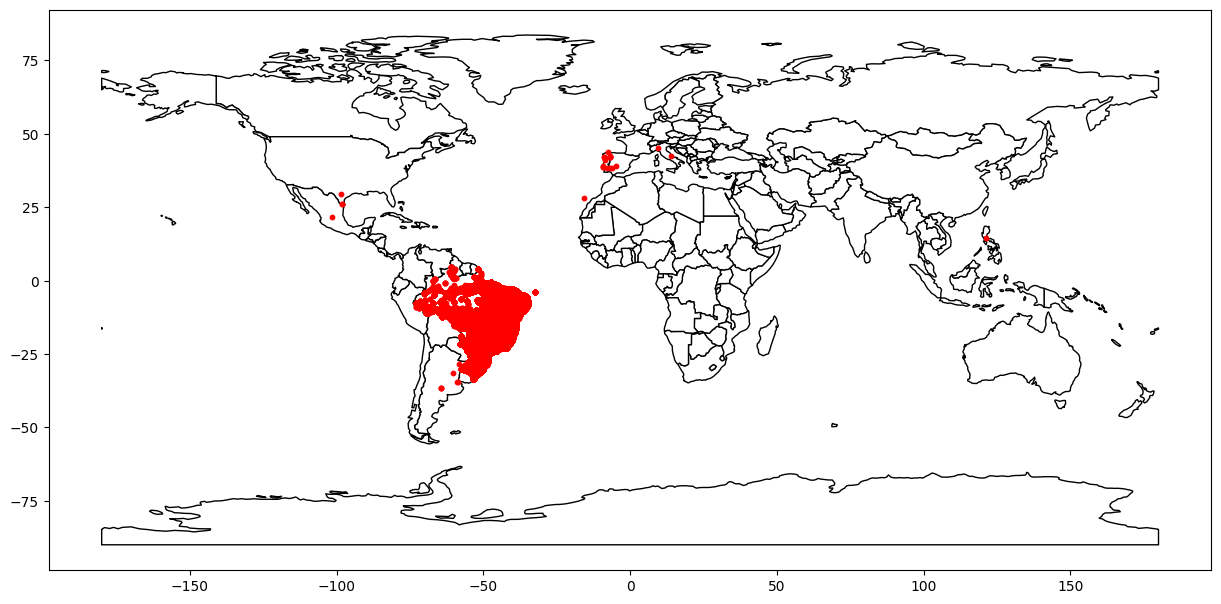

In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# convert pandas DataFrame to geopandas GeoDataFrame
geometry = [Point(xy) for xy in zip(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'])]
gdf = gpd.GeoDataFrame(geolocation_df, geometry=geometry)

# create first the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 15), color='white', edgecolor='black')

# displays markers for each point
gdf.plot(ax=ax, color='red', markersize=10)

# displays map
plt.show()

As we can see in the geoplot above, it is not only Brazil that records orders in our data, but also from foreign countries, even from different continents, for example above there are from the European and Asian continents. The distribution in this geoplot is indeed more in Brazil because the data we have is E-Commerce data from Brazil.

### Correlation (price & freight_value & size_of_product)

In [21]:
order_and_product_df = pd.merge(orders_items_df, products_df, on="product_id")
order_and_product_df.drop(columns=["order_id", "order_item_id", "product_id", "seller_id", "shipping_limit_date",
                                  "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty"]
                         , inplace=True)

order_with_detail_size = order_and_product_df.copy()

order_and_product_df["total_size"] = order_and_product_df["product_weight_g"] + (order_and_product_df["product_length_cm"] * order_and_product_df["product_height_cm"] * order_and_product_df["product_width_cm"])
order_and_product_df.drop(columns=["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"], inplace=True)

order_and_product_df.drop_duplicates(inplace=True)

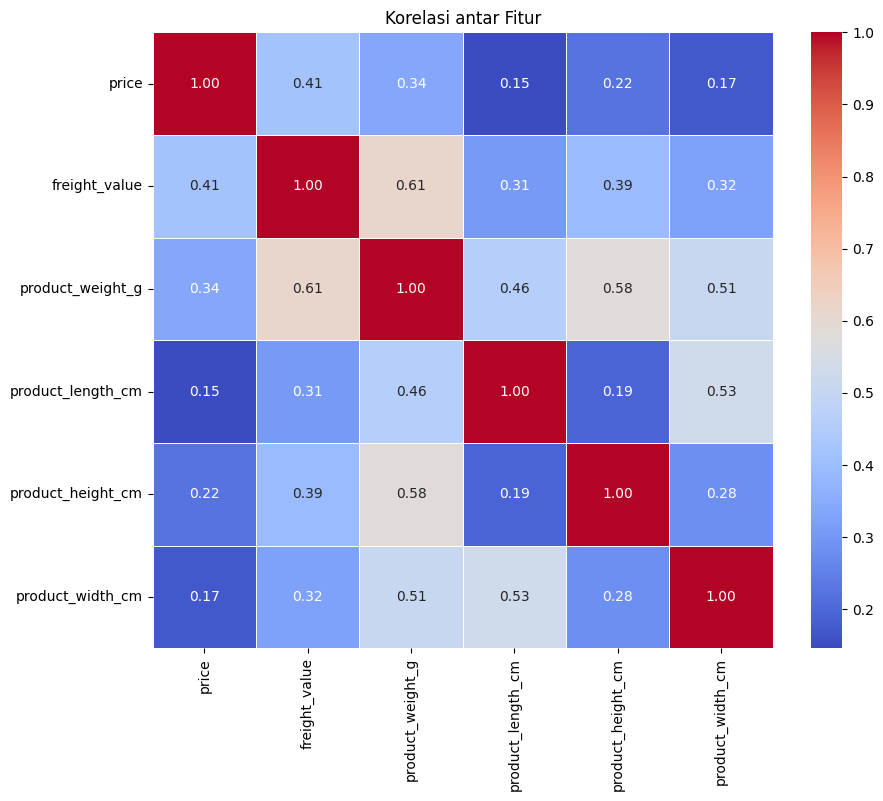

In [22]:
correlation_matrix = order_with_detail_size.corr()

# heatmap with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antar Fitur")
plt.show()

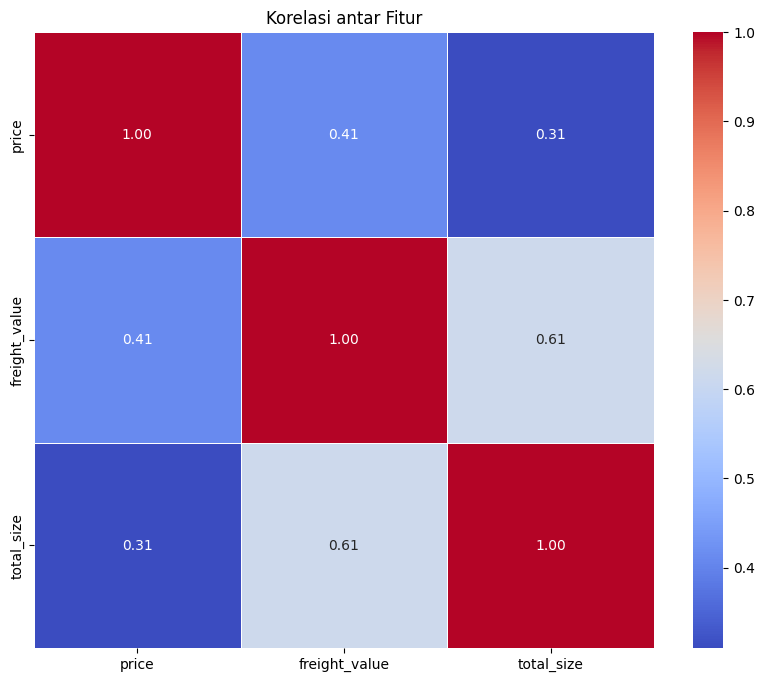

In [23]:
correlation_matrix = order_and_product_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antar Fitur")
plt.show()

If we look at the heatmap above, the `freight_value` and `total_size` columns have a slight correlation, although not large, but have values above 50%.

- freight_value: Shipping Cost
- total_size: total size and weight calculation of the product.

We can conclude that size and weight affect shipping costs, but that doesn't mean large items have large shipping costs. In the second heatmap there is only a combined total of size and weight, but in reality the column that gives the greatest weight is `product_weight_g` which contains the weight of each product.

We can take an example like this:

we order a bag and a pair of dumbbells, in terms of size the dumbles are inferior to the bag but the dumbles are much heavier than the bag (depending on the kg of the dumbles). So the weight is what influences more how expensive the shipping costs are in our case, namely the `freight_value` column.

But it is possible that the greater the height of the item, the greater the cost, as shown in the `product_height_cm` column, because if the item is too large it will take up a lot of storage space.

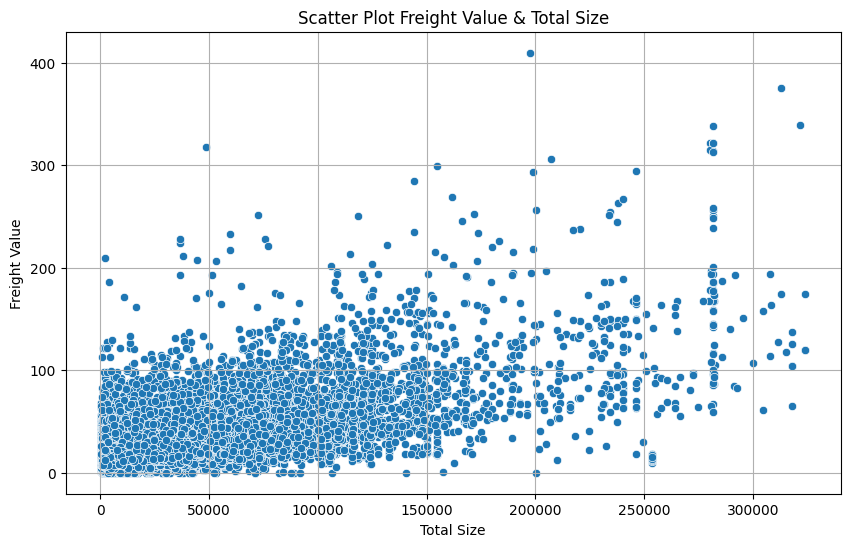

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_size", y="freight_value", data=order_and_product_df)
plt.title("Scatter Plot Freight Value & Total Size")
plt.xlabel("Total Size")
plt.ylabel("Freight Value")
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Quetion 1: What percentage of payment types are used by users?

In [25]:
# view value_counts from payment_type
orders_payments_df["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64


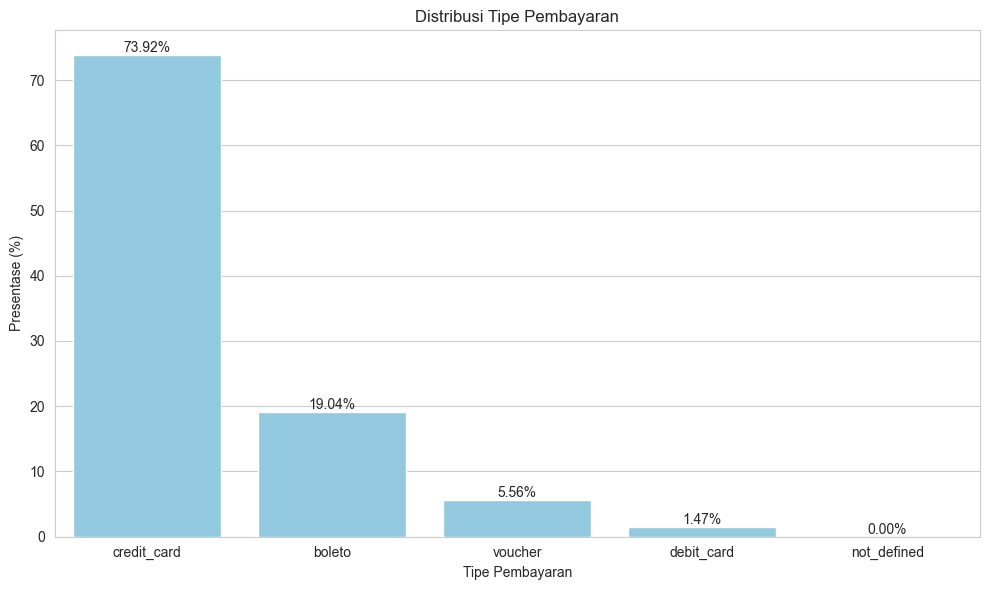

In [26]:
# Data value counts dari payment_type
total_counts = orders_payments_df["payment_type"].count()
value_counts = orders_payments_df["payment_type"].value_counts()

payment_type_percentages = (value_counts / total_counts) * 100
print(payment_type_percentages.round(2))

# Plot barchart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x=payment_type_percentages.index, y=payment_type_percentages.values, color="skyblue")
plt.title('Distribusi Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Presentase (%)')

# Menambahkan persentase pada setiap bar
for i, percentage in enumerate(payment_type_percentages):
    barplot.text(i, percentage, f"{percentage:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Quetion 2: Top 10 Which cities have the highest level of orders each year?

In [27]:
orders_with_cutomers_df["customer_city"].value_counts().head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: count, dtype: int64

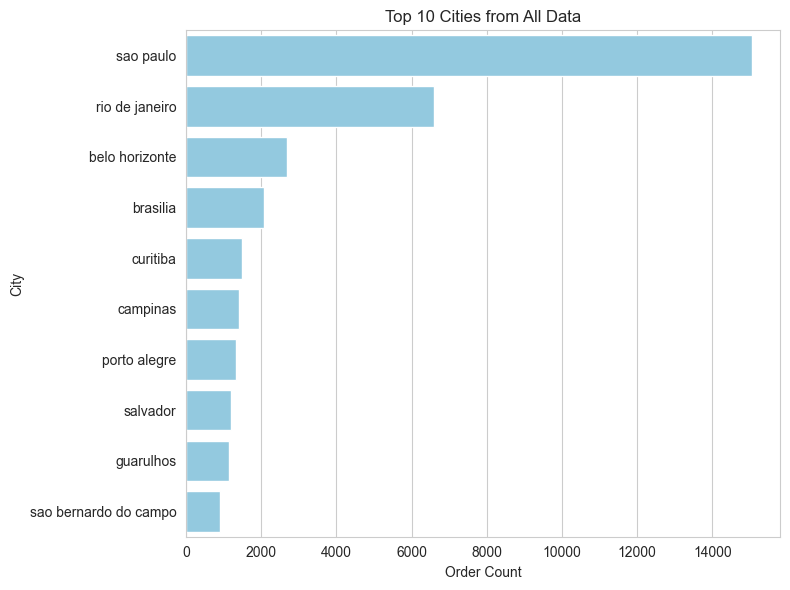

In [28]:
top_10_city_order = orders_with_cutomers_df["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order.values, y=top_10_city_order.index, color="skyblue")

plt.title('Top 10 Cities from All Data')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [29]:
# looks from each years
orders_with_cutomers = orders_with_cutomers_df.copy()
orders_with_cutomers = orders_with_cutomers[["order_purchase_timestamp", "customer_city"]]

orders_with_cutomers["month"] = orders_with_cutomers["order_purchase_timestamp"].dt.month
orders_with_cutomers["years"] = orders_with_cutomers["order_purchase_timestamp"].dt.year

# lets seperate with years
# 2016
orders_with_cutomers_2016 = orders_with_cutomers[orders_with_cutomers["years"] == 2016].sort_values(by="month")

# 2017
orders_with_cutomers_2017 = orders_with_cutomers[orders_with_cutomers["years"] == 2017].sort_values(by="month")

# 2018
orders_with_cutomers_2018 = orders_with_cutomers[orders_with_cutomers["years"] == 2018].sort_values(by="month")

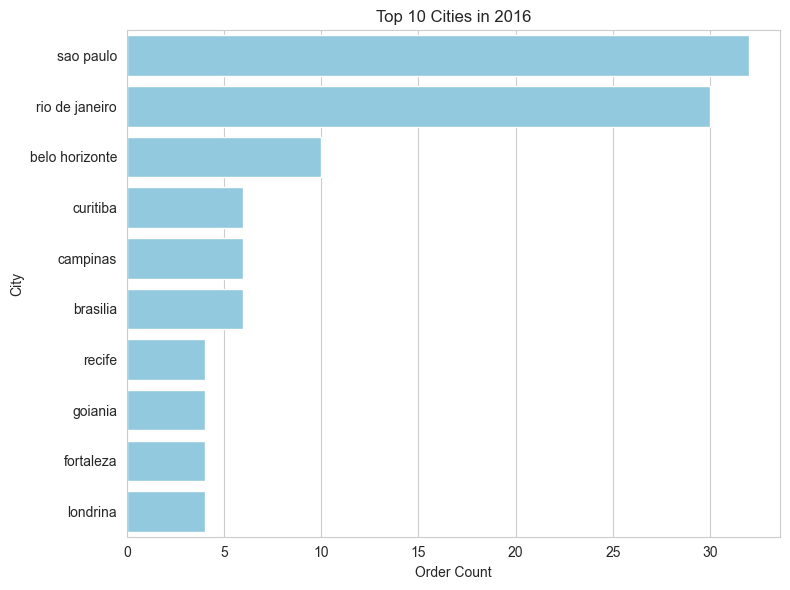

In [30]:
top_10_city_order_2016 = orders_with_cutomers_2016["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order_2016.values, y=top_10_city_order_2016.index, color="skyblue")

plt.title('Top 10 Cities in 2016')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

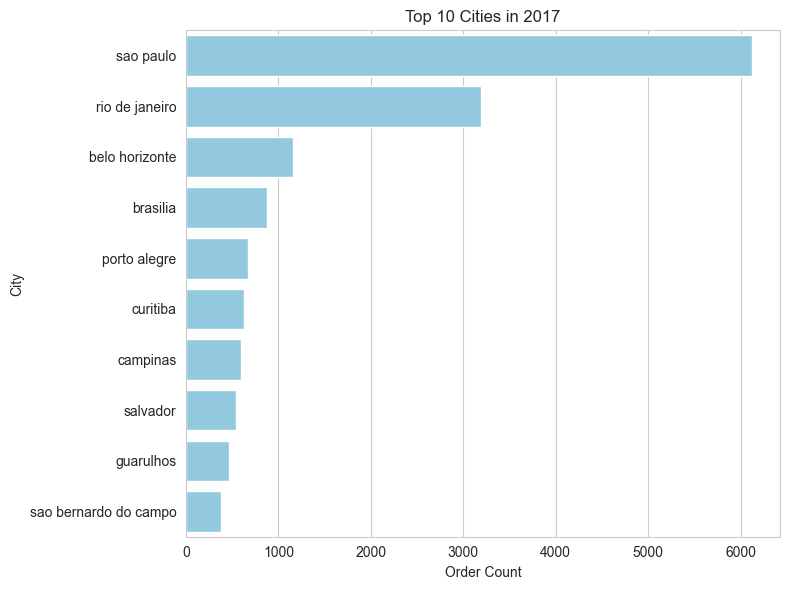

In [31]:
top_10_city_order_2017 = orders_with_cutomers_2017["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order_2017.values, y=top_10_city_order_2017.index, color="skyblue")

plt.title('Top 10 Cities in 2017')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

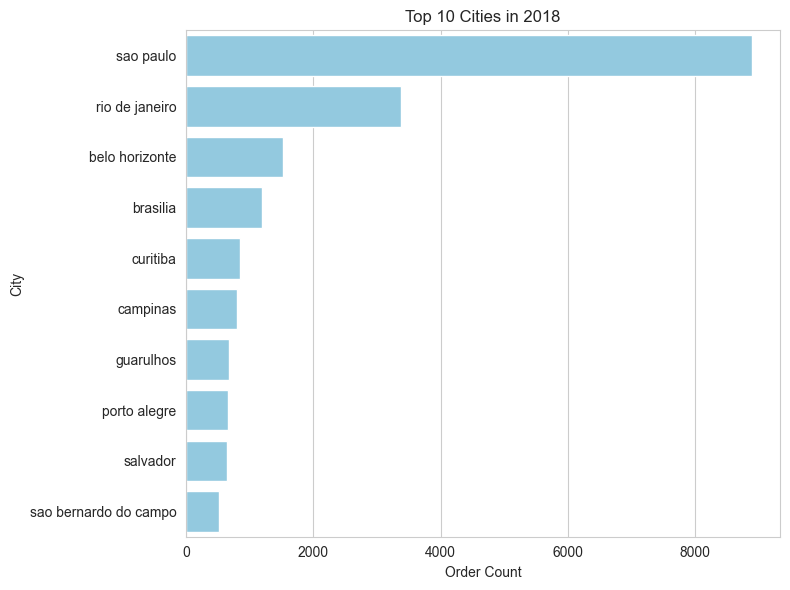

In [32]:
top_10_city_order_2018 = orders_with_cutomers_2018["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_10_city_order_2018.values, y=top_10_city_order_2018.index, color="skyblue")

plt.title('Top 10 Cities in 2018')
plt.xlabel('Order Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Quetion 3: See how orders grow each quarter each year?

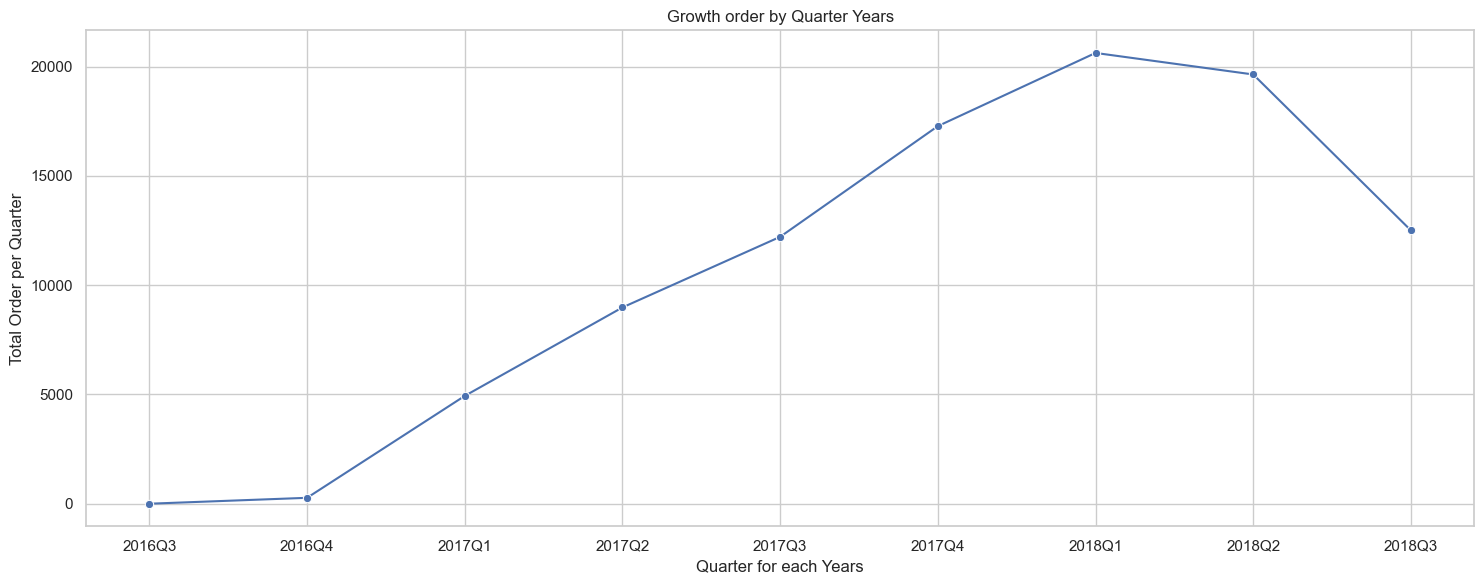

In [33]:
# define data
data_3_quarter = orders_df[["order_purchase_timestamp"]]
data_3_quarter = data_3_quarter.sort_values(by="order_purchase_timestamp")
data_3_quarter["order_purchase_timestamp"] = pd.to_datetime(data_3_quarter["order_purchase_timestamp"])

# set quarter
data_3_quarter["quarter"] = data_3_quarter["order_purchase_timestamp"].dt.to_period("Q")
quarterly_counts = data_3_quarter.groupby(by="quarter").count()
quarter_list = list(quarterly_counts.index.astype(str))

# set plotting
sns.set_theme(style="whitegrid")

# Now plot using Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=quarterly_counts, x=[i for i in quarter_list], y='order_purchase_timestamp', marker="o")
plt.title("Growth order by Quarter Years")
plt.xlabel("Quarter for each Years")
plt.ylabel("Total Order per Quarter")
plt.tight_layout()
plt.show()

## Conclusion

- **Question 1:** We can observe that the predominant payment method is credit card, followed by boleto. Boleto is a popular payment method in Brazil for online transactions. However, it's clear that credit card payments constitute a significant percentage, almost `74%`.

- **Question 2:** Looking at the top 10 cities with the highest number of orders, considering the entire dataset spanning 3 years, Sao Paulo stands out with the highest number of orders, even when broken down annually. It might be worthwhile to focus our target market efforts on this city.

- **Question 3:** Total orders experienced a significant increase from the 3rd quarter of 2016 until reaching a peak in the 1st quarter of 2018. After reaching a peak in the 1st quarter of 2018, total orders experienced a decline in the 3rd quarter of 2018.